In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SimpleRNN,Dense,Activation
import os

In [ ]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=None,skip_top=0,maxlen=None,start_char=1,seed=13,oov_char=2,index_from=3)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

25000 train sequences
25000 test sequences


In [ ]:
print("Type: ", type(X_train))
print("Type: ", type(Y_train))

Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>


In [ ]:
print("X train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)

X train shape:  (25000,)
Y train shape:  (25000,)


EDA


In [ ]:
print("Y train values: ",np.unique(Y_train))
print("Y test values: ",np.unique(Y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [ ]:
unique,counts = np.unique(Y_train,return_counts=True)
print("Y train distribution: ", dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [ ]:
unique,counts = np.unique(Y_test,return_counts=True)
print("Y test distribution: ", dict(zip(unique,counts)))

Y test distribution:  {0: 12500, 1: 12500}


In [ ]:
print(X_train[0])


[1, 608, 13, 6467, 14, 22, 13, 80, 1109, 14, 20, 584, 18, 231, 72, 141, 6, 783, 254, 189, 7060, 13, 100, 115, 106, 14, 20, 584, 207, 82, 557, 111, 111, 537, 7, 4, 962, 12, 69, 11, 45, 204, 766, 33, 4, 8334, 23, 94, 797, 1048, 991, 527, 1987, 538, 2629, 4, 4518, 125, 72, 449, 8295, 68, 3385, 2500, 93, 14, 1190, 22, 13, 119, 12, 13, 197, 4, 226, 22, 16, 542, 5, 221, 14, 20, 9, 38, 629, 14, 9, 4, 6128, 20, 13, 28, 126, 110, 11, 61, 113, 24, 15, 51, 571, 11, 4, 22, 5, 4, 326, 7, 4, 22, 26, 24, 629, 195, 21, 51, 210, 188, 72, 16, 21849, 2726, 116, 118, 189, 22, 126, 164, 70, 126, 30, 14, 629, 174, 2195, 829, 33, 94, 61124]


In [ ]:
review_len_train = []
review_len_test = []
for i,j in zip(X_train,X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(j))

In [ ]:
print("min: ", min(review_len_train), "max: ", max(review_len_train))

min:  11 max:  2494


In [ ]:
print("min: ", min(review_len_test), "max: ", max(review_len_test))

min:  7 max:  2315


<ipython-input-13-bad388684519>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_train,hist_kws={"alpha":0.3});
<ipython-input-13-bad388684519>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_test,hist_kws={"alpha":0.3});


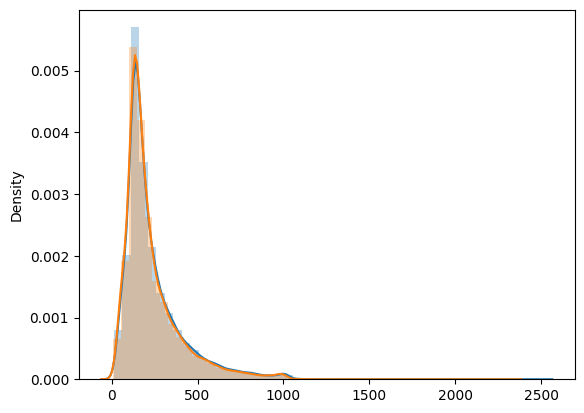

In [ ]:
sns.distplot(review_len_train,hist_kws={"alpha":0.3});
sns.distplot(review_len_test,hist_kws={"alpha":0.3});

In [ ]:
print("Train mean: ",np.mean(review_len_train))
print("Train median: ",np.median(review_len_train))
print("Train mode: ",stats.mode(review_len_train))

Train mean:  238.71364
Train median:  178.0
Train mode:  ModeResult(mode=132, count=196)


In [ ]:
# number or words
word_index = imdb.get_word_index()
print(type(word_index))

1641221/1641221 [==============================] - 0s 0us/step
<class 'dict'>


In [ ]:
print("length of word_index: ",len(word_index))

length of word_index:  88584


In [ ]:
def decode(index=24):
    reverse_index = dict([(value,key) for (key,value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i-3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

In [ ]:
decoded_review =decode()

! this movie was extremely funny i would like to own this for my vintage collection of 1970s movie must see again list i know this cast of characters they are people that i have met over the years and that prompt me to search out this comedy unfortunately this was never put to dvd or vhs redd foxx always a clown of comedy pearl baily a great match as his wife witty and sassy norman a son with a secret not sure if he will have a future if it is out dennis dugan crazy funny man miss dobson hooker with a heart and little conscience love lust strange family ties this movie qualifies for a come back encore performance situation comedy with a mix of events as this could and should find its way as a remake i do think finding cast would be extremely difficult maybe impossible except jerry seinfeld playing dennis dugan role this earmarks a couple of seinfeld episodes that also brought me back to norman is that you keeping them in the closest was surely impossible as impossible to reform pretend

# Preprocessing

In [ ]:
!pip install --quiet optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
import optuna

optuna.__version__

'3.4.0'

In [ ]:
import optuna
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Activation
from keras.optimizers import RMSprop, Adam

def build_rnn_model(num_words, maxlen, embedding_dim=32, rnn_units=16, optimizer_type='rmsprop'):
    model = Sequential()
    model.add(Embedding(num_words, embedding_dim, input_length=maxlen))
    model.add(SimpleRNN(rnn_units, return_sequences=False, activation="relu"))
    model.add(Dense(1))
    model.add(Activation("sigmoid"))

    if optimizer_type == 'rmsprop':
        optimizer = RMSprop()
    else:
        optimizer = Adam()

    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def objective(trial):
    # Suggesting hyperparameters
    num_words = trial.suggest_categorical('num_words', [15000, 30000, 45000, 60000, 75000, 88000])
    maxlen = trial.suggest_categorical('maxlen', [150, 250, 350, 450, 550, 650, 750])
    embedding_dim = trial.suggest_categorical('embedding_dim', [16, 32, 64])
    rnn_units = trial.suggest_categorical('rnn_units', [8, 16, 32])
    optimizer_type = trial.suggest_categorical('optimizer_type', ['rmsprop', 'adam'])

    # Load and preprocess data
    (X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)
    X_train = pad_sequences(X_train, maxlen=maxlen)
    X_test = pad_sequences(X_test, maxlen=maxlen)

    # Build and compile model
    model = build_rnn_model(num_words, maxlen, embedding_dim, rnn_units, optimizer_type)

    # Fit the model
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                        epochs=5, batch_size=128, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    return accuracy

# Running the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Adjust the number of trials as needed

# Best hyperparameters
best_params = study.best_params
print('Best hyperparameters:', best_params)

# Rebuild the model with the best parameters
best_model = build_rnn_model(best_params['num_words'], best_params['maxlen'],
                             best_params['embedding_dim'], best_params['rnn_units'],
                             best_params['optimizer_type'])


[I 2023-12-01 06:26:08,942] A new study created in memory with name: no-name-10d977b3-e2f6-4c2e-b3a4-b8cc572f8278
[I 2023-12-01 06:30:08,005] Trial 0 finished with value: 0.8403199911117554 and parameters: {'num_words': 60000, 'maxlen': 350, 'embedding_dim': 32, 'rnn_units': 8, 'optimizer_type': 'rmsprop'}. Best is trial 0 with value: 0.8403199911117554.
[I 2023-12-01 06:38:03,490] Trial 1 finished with value: 0.829479992389679 and parameters: {'num_words': 45000, 'maxlen': 750, 'embedding_dim': 64, 'rnn_units': 16, 'optimizer_type': 'adam'}. Best is trial 0 with value: 0.8403199911117554.
[I 2023-12-01 06:43:21,222] Trial 2 finished with value: 0.8648399710655212 and parameters: {'num_words': 75000, 'maxlen': 650, 'embedding_dim': 32, 'rnn_units': 16, 'optimizer_type': 'adam'}. Best is trial 2 with value: 0.8648399710655212.
[I 2023-12-01 06:47:44,238] Trial 3 finished with value: 0.8502799868583679 and parameters: {'num_words': 30000, 'maxlen': 450, 'embedding_dim': 64, 'rnn_units': 

Best hyperparameters: {'num_words': 15000, 'maxlen': 350, 'embedding_dim': 16, 'rnn_units': 16, 'optimizer_type': 'rmsprop'}


In [ ]:
num_words = 15000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [ ]:
maxlen=500
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
print("X train shape: ",X_train.shape)

X train shape:  (25000, 500)


In [ ]:
for i in X_train[0:5]:
    print(len(i))

500
500
500
500
500


In [ ]:
decoded_review = decode()


! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! the original demille movie was made in 1938 with ! march a very good film indeed hollywood's love of remakes brings us a fairly interesting movie starring ! brynner he of course was br

# RNN

In [ ]:
rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(X_train[0])))
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480801 (1.83 MB)
Trainable params: 480801 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = rnn.fit(X_train,Y_train,
                  validation_data = (X_test,Y_test),
                  epochs = 5,
                  batch_size=128,
                  verbose = 1)

Epoch 1/5
196/196 [==============================] - 43s 208ms/step - loss: 14.2935 - accuracy: 0.6730 - val_loss: 0.4927 - val_accuracy: 0.8332
Epoch 2/5
196/196 [==============================] - 36s 184ms/step - loss: 0.7990 - accuracy: 0.8422 - val_loss: 0.3811 - val_accuracy: 0.8293
Epoch 3/5
196/196 [==============================] - 39s 199ms/step - loss: 0.3538 - accuracy: 0.8695 - val_loss: 0.3294 - val_accuracy: 0.8541
Epoch 4/5
196/196 [==============================] - 39s 196ms/step - loss: 0.2863 - accuracy: 0.8933 - val_loss: 0.2867 - val_accuracy: 0.8780
Epoch 5/5
196/196 [==============================] - 39s 199ms/step - loss: 0.2439 - accuracy: 0.9086 - val_loss: 0.2826 - val_accuracy: 0.8817


In [ ]:
print("80000 - 500")
score = rnn.evaluate(X_test,Y_test)


80000 - 500
782/782 [==============================] - 20s 25ms/step - loss: 0.2826 - accuracy: 0.8817


In [ ]:
print("80000 - 500")

print("\n accuracy:", score[1]*100)


80000 - 500

 accuracy: 88.17200064659119


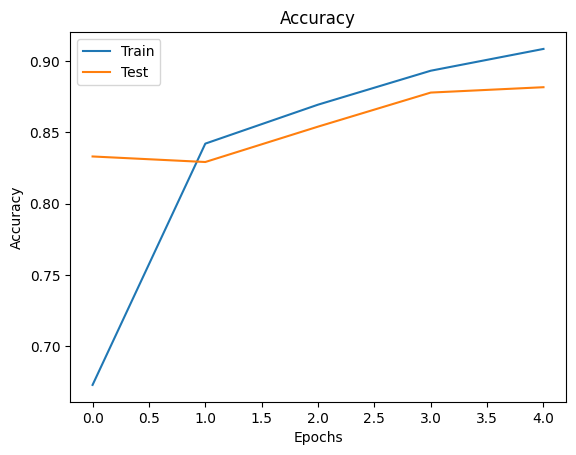

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

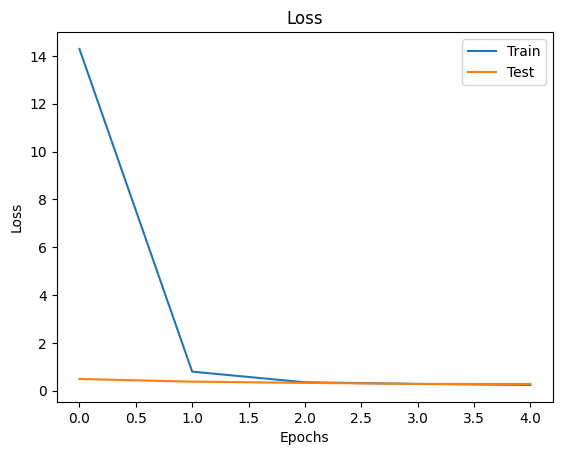

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

# **========================================================================**

In [ ]:
num_words = 15000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [ ]:
maxlen=500
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
print("X train shape: ",X_train.shape)

X train shape:  (25000, 500)


In [ ]:
for i in X_train[0:5]:
    print(len(i))

500
500
500
500
500


In [ ]:
rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(X_train[0])))
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           480000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 480801 (1.83 MB)
Trainable params: 480801 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = rnn.fit(X_train,Y_train,
                  validation_data = (X_test,Y_test),
                  epochs = 5,
                  batch_size=128,
                  verbose = 1)

Epoch 1/5
196/196 [==============================] - 41s 201ms/step - loss: 0.6598 - accuracy: 0.6082 - val_loss: 0.5329 - val_accuracy: 0.7834
Epoch 2/5
196/196 [==============================] - 38s 195ms/step - loss: 0.4584 - accuracy: 0.8121 - val_loss: 0.4515 - val_accuracy: 0.8069
Epoch 3/5
196/196 [==============================] - 35s 180ms/step - loss: 0.3240 - accuracy: 0.8698 - val_loss: 0.3827 - val_accuracy: 0.8586
Epoch 4/5
196/196 [==============================] - 38s 196ms/step - loss: 0.2723 - accuracy: 0.8952 - val_loss: 0.2982 - val_accuracy: 0.8774
Epoch 5/5
196/196 [==============================] - 39s 199ms/step - loss: 0.2297 - accuracy: 0.9148 - val_loss: 0.3085 - val_accuracy: 0.8748


In [ ]:
print("15000 - 500")
score = rnn.evaluate(X_test,Y_test)


15000 - 500
782/782 [==============================] - 19s 25ms/step - loss: 0.3085 - accuracy: 0.8748


In [ ]:
print("15000 - 500")
print("\n accuracy:", score[1]*100)


15000 - 500

 accuracy: 87.47599720954895


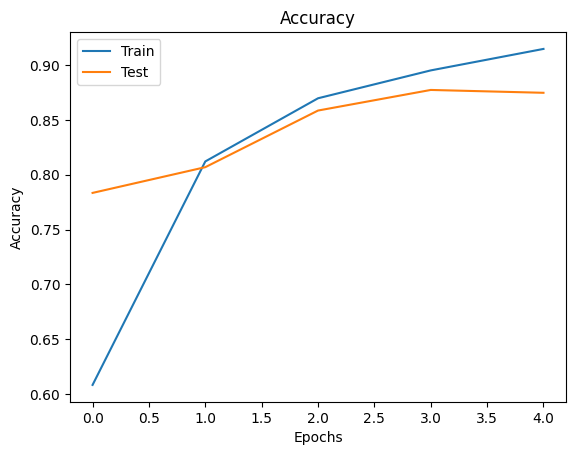

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

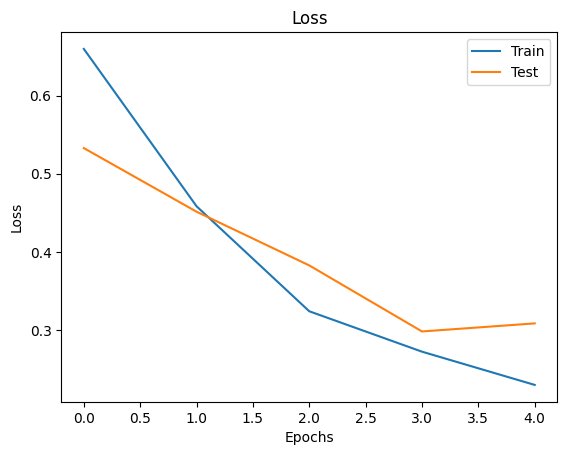

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

In [ ]:
num_words = 88000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [ ]:
maxlen=750
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
print("X train shape: ",X_train.shape)

X train shape:  (25000, 750)


In [ ]:
for i in X_train[0:5]:
    print(len(i))

750
750
750
750
750


In [ ]:
rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(X_train[0])))
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 750, 32)           2816000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 2816801 (10.75 MB)
Trainable params: 2816801 (10.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = rnn.fit(X_train,Y_train,
                  validation_data = (X_test,Y_test),
                  epochs = 5,
                  batch_size=128,
                  verbose = 1)

Epoch 1/5
196/196 [==============================] - 58s 288ms/step - loss: 0.6481 - accuracy: 0.6210 - val_loss: 0.5038 - val_accuracy: 0.8002
Epoch 2/5
196/196 [==============================] - 56s 285ms/step - loss: 0.4265 - accuracy: 0.8214 - val_loss: 0.3630 - val_accuracy: 0.8452
Epoch 3/5
196/196 [==============================] - 56s 288ms/step - loss: 0.3086 - accuracy: 0.8763 - val_loss: 0.3291 - val_accuracy: 0.8696
Epoch 4/5
196/196 [==============================] - 57s 292ms/step - loss: 0.2619 - accuracy: 0.9054 - val_loss: 0.3388 - val_accuracy: 0.8715
Epoch 5/5
196/196 [==============================] - 57s 291ms/step - loss: 0.1938 - accuracy: 0.9289 - val_loss: 0.3231 - val_accuracy: 0.8659


In [ ]:
print("88000 - 750")
score = rnn.evaluate(X_test,Y_test)


88000 - 750
782/782 [==============================] - 30s 39ms/step - loss: 0.3231 - accuracy: 0.8659


In [ ]:
print("88000 - 750")
print("\n accuracy:", score[1]*100)


88000 - 750

 accuracy: 86.5880012512207


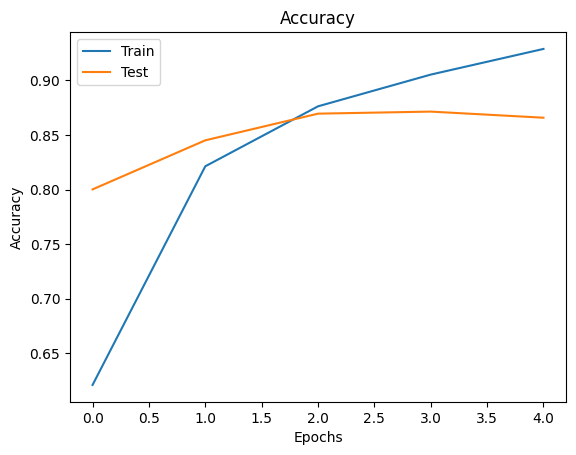

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

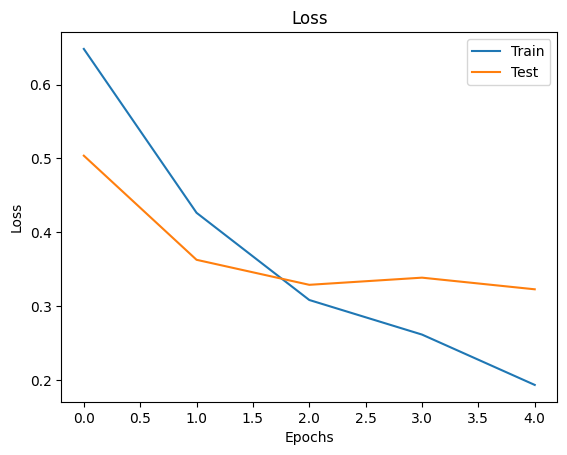

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

In [ ]:
num_words = 88000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [ ]:
maxlen=500
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
print("X train shape: ",X_train.shape)

X train shape:  (25000, 500)


In [ ]:
for i in X_train[0:5]:
    print(len(i))

500
500
500
500
500


In [ ]:
rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(X_train[0])))
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           2816000   
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 2816801 (10.75 MB)
Trainable params: 2816801 (10.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = rnn.fit(X_train,Y_train,
                  validation_data = (X_test,Y_test),
                  epochs = 5,
                  batch_size=128,
                  verbose = 1)

Epoch 1/5
196/196 [==============================] - 43s 212ms/step - loss: 0.6051 - accuracy: 0.6792 - val_loss: 0.4468 - val_accuracy: 0.7978
Epoch 2/5
196/196 [==============================] - 42s 213ms/step - loss: 0.3985 - accuracy: 0.8361 - val_loss: 0.3808 - val_accuracy: 0.8395
Epoch 3/5
196/196 [==============================] - 36s 186ms/step - loss: 0.3109 - accuracy: 0.8775 - val_loss: 0.3285 - val_accuracy: 0.8604
Epoch 4/5
196/196 [==============================] - 44s 223ms/step - loss: 0.2498 - accuracy: 0.9088 - val_loss: 0.3099 - val_accuracy: 0.8780
Epoch 5/5
196/196 [==============================] - 41s 209ms/step - loss: 0.2213 - accuracy: 0.9224 - val_loss: 0.2887 - val_accuracy: 0.8811


In [ ]:
print("88000 - 500")
score = rnn.evaluate(X_test,Y_test)


88000 - 500
782/782 [==============================] - 20s 25ms/step - loss: 0.2887 - accuracy: 0.8811


In [ ]:
print("88000 - 500")
print("\n accuracy:", score[1]*100)


88000 - 500

 accuracy: 88.11200261116028


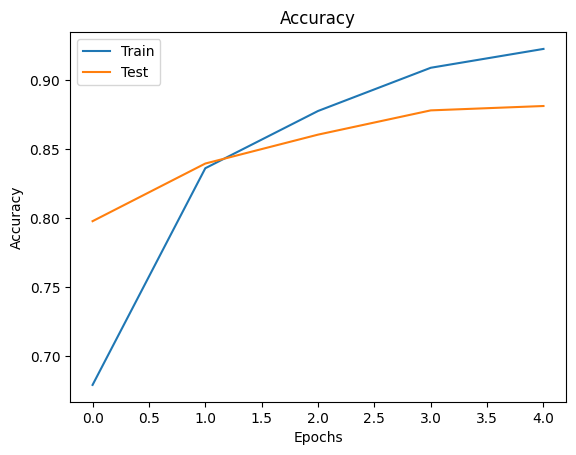

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

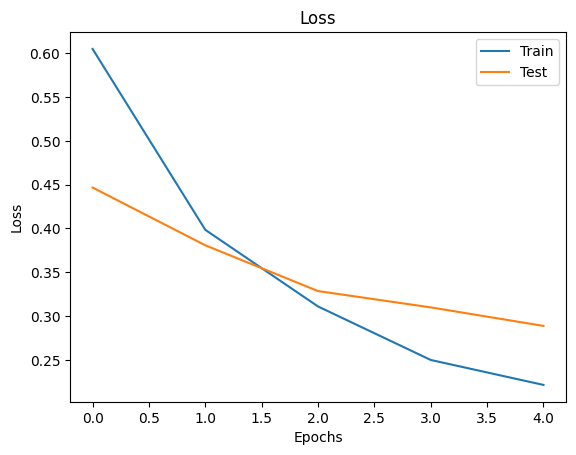

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();